# Analysis on accuracy

In [3]:
%run ../oscilloscope/script/dataset.py

from keras import layers
from keras import models

DATASET_FOLDER = "../dataset/data_my_home"
SAVED_MODEL = "../dataset/data_my_home/my_home_cnn_colab_20190324213722.h5"

In [4]:
ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(update=False, shuffle=False)['mfsc']

model = models.load_model(SAVED_MODEL)
ds.class_labels

['chat',
 'reading',
 'watching_tv',
 'cocking',
 'hamster',
 'silence',
 'vacuum_cleaner',
 'shower',
 'washing_machine',
 'doing_the_dishes',
 'walking',
 'piano',
 'stairs',
 'snack']

In [5]:
train_data, train_labels = ds.reshape_per_class(train_data, train_labels)

'watching_tv'

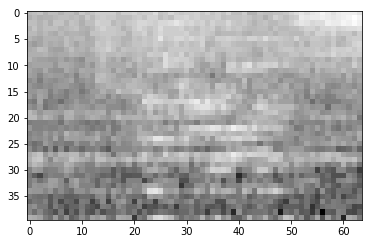

In [85]:
l = ds.class_labels.index('watching_tv')
image_number = 33

plt.imshow(np.rot90(train_data[l, image_number,:,:,0]), cmap='gray')
ds.class_labels[np.argmax(train_labels[l, image_number])]

In [86]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_data[l])

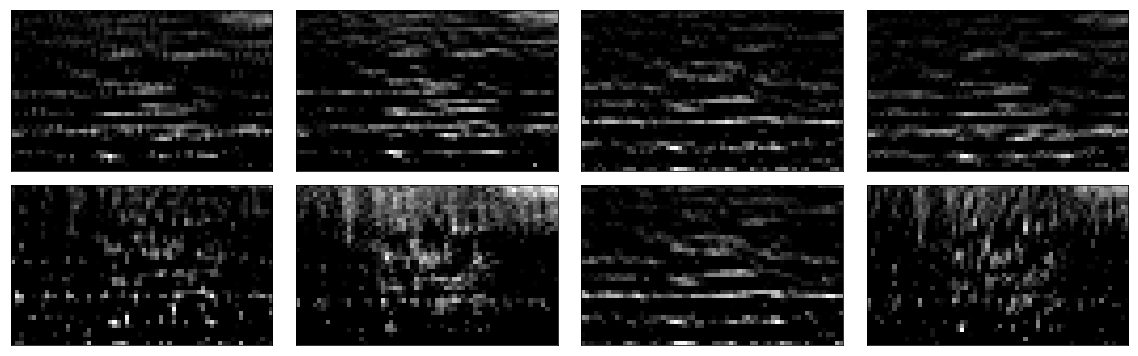

In [87]:
plot_layer(activations, image_number, 0, 4)

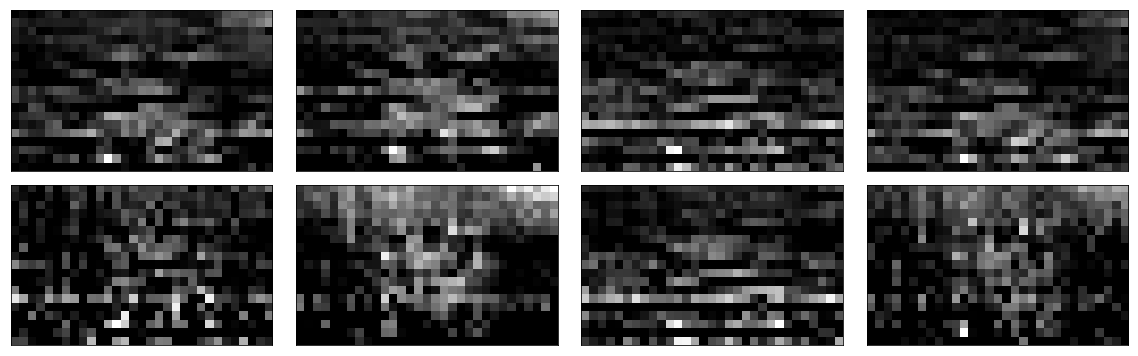

In [88]:
plot_layer(activations, image_number, 1, 4)

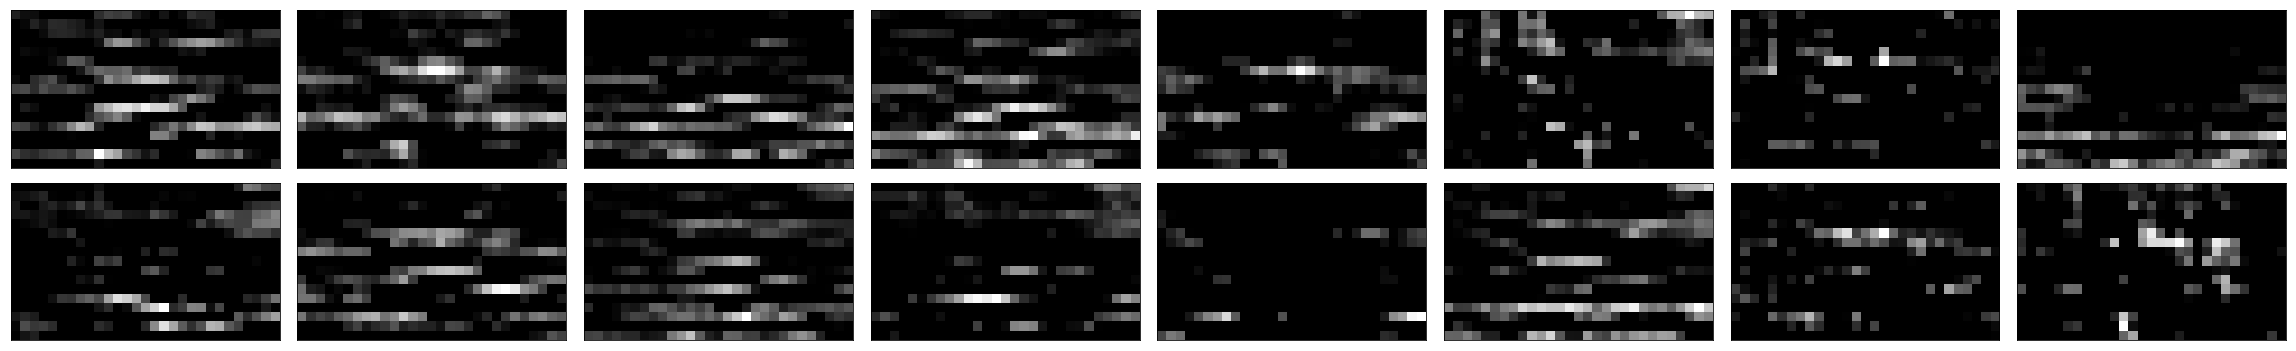

In [89]:
plot_layer(activations, image_number, 3, 8)

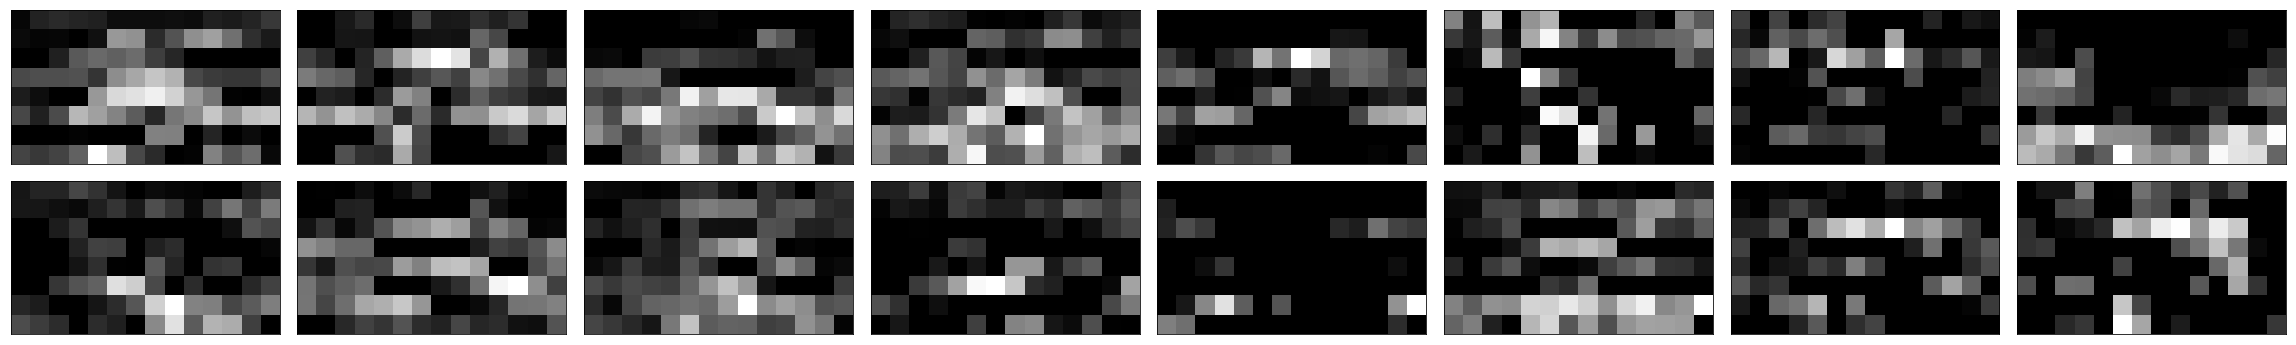

In [90]:
plot_layer(activations, image_number, 4, 8)

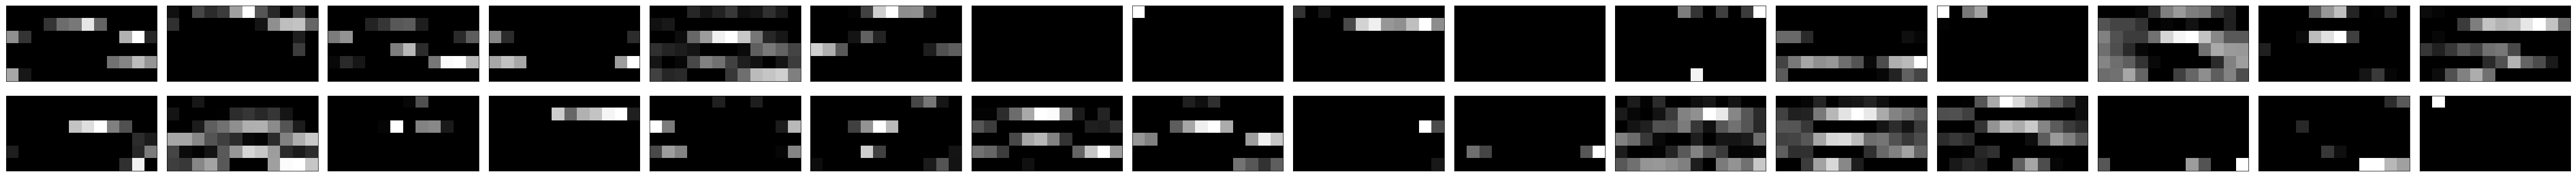

In [91]:
plot_layer(activations, image_number, 6, 16)

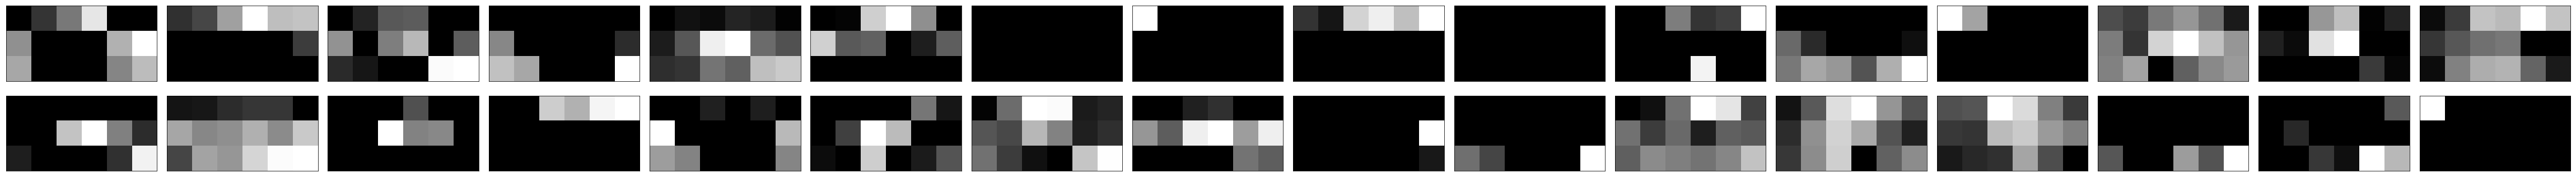

In [92]:
plot_layer(activations, image_number, 7, 16)

In [93]:
inference = (activations[-1]*100).astype(int)
index = np.array([np.argmax(l) for l in inference], dtype=int)
index

array([ 2,  2,  2,  2,  2,  2, 11,  2,  2,  2,  2,  3,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  9,  2,  2,  2,  2,  2,  2,  4,  2,  2,  2,  7,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  7,  2,  7,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

In [111]:
error = np.where(index != l)
error

(array([ 6, 11, 37, 44, 48, 59, 61], dtype=int64),)

In [114]:
image_number = 6
ds.class_labels[index[image_number]]

'piano'

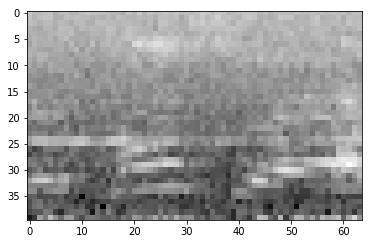

In [115]:
plt.imshow(np.rot90(train_data[l, image_number,:,:,0]), cmap='gray')